In [4]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt
import random

# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)

from helpers import *
from denoising_pipeline import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
# Set and adjust the paths to the data and output folders
data_path, output_path = get_paths()
data_path = os.path.join('..', 'data', 'raw/')
output_path = os.path.join('..', 'data', 'processed/')

# Load the raw image
channel = 0
image_index = '001'
image_path = f'Image{image_index}/wf_channel{channel}.npy'
image = load_image(data_path, image_path)

# Sample and ground truth images
slice = sample_image(image)
ground_truth_image = ground_truth(image)

# Load denoised images from different methods and parameters

# Gaussian denoising
denoised_image_gaussian = np.load(os.path.join(output_path, 'Gaussian/Gaussian_denoised_channel0_image001_param2.npy'))

# Median denoising
denoised_image_median_param5 = np.load(os.path.join(output_path, 'Median/Median_denoised_channel0_image001_param5.npy'))
denoised_image_median_param8 = np.load(os.path.join(output_path, 'Median/Median_denoised_channel0_image001_param8.npy'))
denoised_image_median_param10 = np.load(os.path.join(output_path, 'Median/Median_denoised_channel0_image001_param10.npy'))

# TV-Chambolle denoising
denoised_image_TV_Chambolle_param01 = np.load(os.path.join(output_path, 'TV-Chambolle/TV-Chambolle_denoised_channel0_image001_param0.1.npy'))
denoised_image_TV_Chambolle_param02 = np.load(os.path.join(output_path, 'TV-Chambolle/TV-Chambolle_denoised_channel0_image001_param0.2.npy'))
denoised_image_TV_Chambolle_param03 = np.load(os.path.join(output_path, 'TV-Chambolle/TV-Chambolle_denoised_channel0_image001_param0.3.npy'))

# TV-ISO denoising
denoised_TV_ISO_01_image = np.load(os.path.join(output_path, 'TV-ISO/TV-ISO_denoised_channel0_image001_param0.1.npy'))
denoised_TV_ISO_005_image = np.load(os.path.join(output_path, 'TV-ISO/TV-ISO_denoised_channel0_image001_param0.05.npy'))
denoised_TV_ISO_008_image = np.load(os.path.join(output_path, 'TV-ISO/TV-ISO_denoised_channel0_image001_param0.08.npy'))

# Wavelet denoising
denoised_image_Wavelet = np.load(os.path.join(output_path, 'Wavelet/Wavelet_denoised_channel0_image001.npy'))

# NL-Means denoising
denoised_image_NL_Means = np.load(os.path.join(output_path, 'NL-Means/NL-Means_denoised_channel0_image001.npy'))

# BM3D denoising
denoised_image_BM3D_param01 = np.load(os.path.join(output_path, 'BM3D/BM3D_denoised_channel0_image001_param0.05.npy'))
denoised_image_BM3D_param01 = np.load(os.path.join(output_path, 'BM3D/BM3D_denoised_channel0_image001_param0.1.npy'))
denoised_image_BM3D_param01 = np.load(os.path.join(output_path, 'BM3D/BM3D_denoised_channel0_image001_param0.15.npy'))

# Noise2Noise denoising
denoised_image_Noise2Noise = np.load(os.path.join(output_path, 'Noise2Noise/Noise2Noise_denoised_channel0_image001.npy'))

## Plots

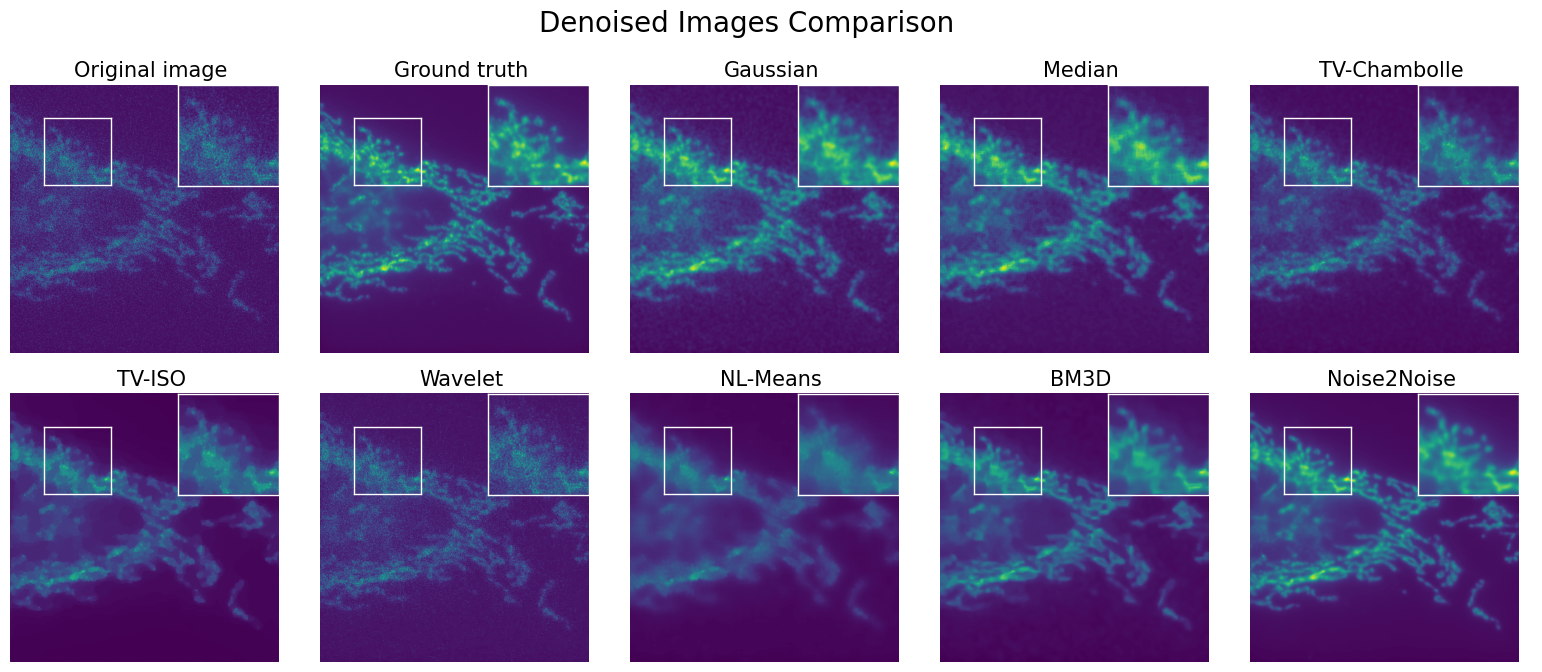

In [6]:
# Plot the denoised images
fig, ax = plt.subplots(2, 5, figsize=(20, 7.5))
fig.suptitle('Denoised Images Comparison', fontsize=20)

plt.subplots_adjust(wspace=0, hspace=0.15)

# Define the size of the top-right square
inset_size = 192

# Process each image
process_image(slice, ax[0,0], 'Original image', inset_size)
process_image(ground_truth_image, ax[0,1], 'Ground truth', inset_size)
process_image(denoised_image_gaussian, ax[0,2], 'Gaussian', inset_size)
process_image(denoised_image_median_param8, ax[0,3], 'Median', inset_size)
process_image(denoised_image_TV_Chambolle_param01, ax[0,4], 'TV-Chambolle', inset_size)
process_image(denoised_TV_ISO_01_image, ax[1,0], 'TV-ISO', inset_size)
process_image(denoised_image_Wavelet, ax[1,1], 'Wavelet', inset_size)
process_image(denoised_image_NL_Means, ax[1,2], 'NL-Means', inset_size)
process_image(denoised_image_BM3D_param01, ax[1,3], 'BM3D', inset_size)
process_image(denoised_image_Noise2Noise, ax[1,4], 'Noise2Noise', inset_size)

plt.show()